<a href="https://colab.research.google.com/github/bankadilasha11/NLP-ntural-language-processing-/blob/master/hotel_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv("hotel.csv")

In [19]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [20]:
df.shape

(38932, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [26]:
df.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id42138,1
Description,38932,38932,My wife was flying in from Singapore and I was...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [28]:
df.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


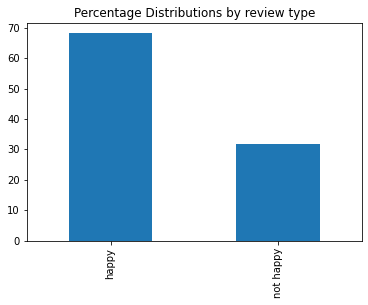

In [30]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(df.Is_Response.value_counts(normalize=True)*100,2))
round(df.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [32]:
#Removing columns
df.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [50]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [53]:
# Let's take a look at the updated text
df['cleaned_description'] = pd.DataFrame(df.Description.apply(cleaned1))
df.head(10)

,Description,Is_Response,cleaned_description
0,room kind clean strong smell dogs Generally av...,not happy,room kind clean strong smell dogs generally av...
1,stayed Crown Plaza April April staff friendly ...,not happy,stayed crown plaza april april staff friendly ...
2,booked hotel Hotwire lowest price could find g...,not happy,booked hotel hotwire lowest price could find g...
3,Stayed husband sons way Alaska Cruise loved ho...,happy,stayed husband sons way alaska cruise loved ho...
4,girlfriends stayed celebrate th birthdays plan...,not happy,girlfriends stayed celebrate th birthdays plan...
5,rooms One nice clearly updated recently clean ...,happy,rooms one nice clearly updated recently clean ...
6,husband stayed hotel times Though fanciest hot...,not happy,husband stayed hotel times though fanciest hot...
7,wife stayed glorious city back SF expensive fo...,happy,wife stayed glorious city back sf expensive fo...
8,boyfriend stayed Fairmont recent trip San Fran...,happy,boyfriend stayed fairmont recent trip san fran...
9,Wonderful staff great location definately pric...,not happy,wonderful staff great location definately pric...


In [54]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [56]:
# Let's take a look at the updated text
df['cleaned_description_new'] = pd.DataFrame(df['cleaned_description'].apply(cleaned2))
df.head()

,Description,Is_Response,cleaned_description,cleaned_description_new
0,room kind clean strong smell dogs Generally av...,not happy,room kind clean strong smell dogs generally av...,room kind clean strong smell dogs generally av...
1,stayed Crown Plaza April April staff friendly ...,not happy,stayed crown plaza april april staff friendly ...,stayed crown plaza april april staff friendly ...
2,booked hotel Hotwire lowest price could find g...,not happy,booked hotel hotwire lowest price could find g...,booked hotel hotwire lowest price could find g...
3,Stayed husband sons way Alaska Cruise loved ho...,happy,stayed husband sons way alaska cruise loved ho...,stayed husband sons way alaska cruise loved ho...
4,girlfriends stayed celebrate th birthdays plan...,not happy,girlfriends stayed celebrate th birthdays plan...,girlfriends stayed celebrate th birthdays plan...


In [79]:
from sklearn.model_selection import train_test_split

Independent_var = df.cleaned_description_new
Dependent_var = df.Is_Response

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 270)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 35038
IV_test  : 3894
DV_train : 35038
DV_test  : 3894


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [81]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[2464,  306],
       [ 153,  971]])

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8821263482280431
Precision :  0.8892443541471581
Recall :  0.8821263482280431


In [83]:
example = ["I'm happy"]
result = model.predict(example)

print(result)

['happy']


In [84]:
example = ["terrible"]
result = model.predict(example)

print(result)

['not happy']


In [85]:
example = ["fun"]
result = model.predict(example)

print(result)

['happy']


In [86]:
example = ["pathetic"]
result = model.predict(example)

print(result)

['not happy']
